# Estatística descritiva bivariada

## Correlação entre duas variáveis quantitativas

Agora, nosso objetivo é avaliar a existência de relação entre variáveis quantitativas, além do grau de correlação entre elas. Este estudo pode ser feito por meio de tabelas de distribuições de frequências, representações gráficas, como o gráfico de dispersão, além de medidas de correlação, como a covariância e o coeficiente de correlação de Pearson.

Quanto a tabelas de distribuição de frequências, o procedimento é o mesmo visto em outros momentos, inclusive no que diz respeito ao eventualmente agrupamento de dados contínuos em intervalos de classes se for conveniente.

A covariância mede a variação conjunta entre duas variáveis quantitativas *X* e *Y*:

$$
\mathrm{cov}(X, Y) = \frac{\sum\limits_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

em que:
- $X_i$ e $Y_i$ são os valores das variáveis *X* e *Y*;
- $\bar{X}$ e $\bar{Y}$ são as médias das variáveis *X* e *Y*;
- $n$ é o número de observações.

Uma das limitações da covariância é que a medida depende do tamanho da amostra, podendo levar a uma estivativa ruim em casos de pequenas amostras. Nestes casos, o coeficiente de correlação de Pearson é uma alternativa.

O coeficiente de correlação de Pearson ($\rho$) é uma medida que varia entre -1 e 1. Por meio do sinal, é possível verificar o tipo de relação linear entre as duas variáveis analisadas (direção em que a variável Y aumenta ou diminui em função da variação de X); quanto mais próximo dos valores extremos, mais forte é a correlação entre elas. Logo:

- Se $\rho$ for positivo, existe uma relação diretamente proporcional entre as variáveis; se $\rho$ = 1, tem-se uma correlação linear positiva perfeita.
- Se $\rho$ for negativo, existe uma relação inversamente proporcional entre as variáveis; se $\rho$ = -1, tem-se uma correlação linear negativa perfeita.
- Se $\rho$ for nulo, não existe correlação entre as variáveis.

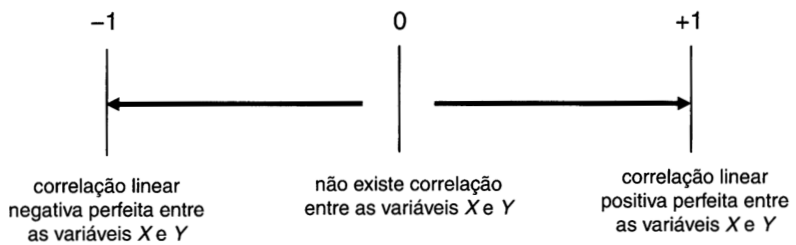

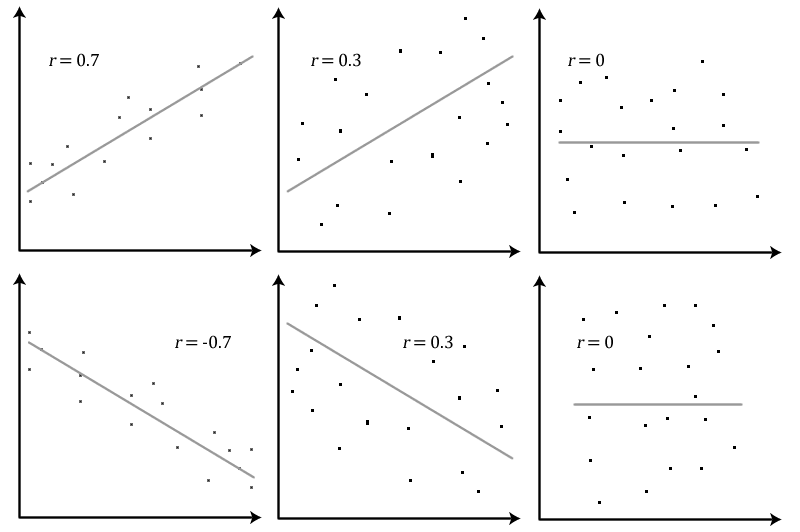

O coeficiente de correlação de Pearson pode ser calculado como a razão entre a covariância de duas variáveis e o produto dos desvios-padrão:

$$
\rho = \frac{\mathrm{cov}(X, Y)}{S_X S_Y}
$$

Para ilustrar, considere a base de dados a seguir. Ela apresenta dados de renda familiar e anos de estudo. Nosso objetivo é verificar se há correlação entre essas variáveis.

In [1]:
import pandas as pd

DADOS_RENDA_ESTUDO = "./dados/income_education.csv"

df_renda_estudo = pd.read_csv(DADOS_RENDA_ESTUDO)

df_renda_estudo.head()

,years_education,family_income
0,4.8,992
1,5.2,891
2,5.3,951
3,5.3,824
4,5.4,739


In [2]:
df_renda_estudo.tail()

,years_education,family_income
97,8.6,3438
98,8.7,4303
99,8.7,3277
100,8.8,3125
101,9.2,3931


In [3]:
df_renda_estudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   years_education  102 non-null    float64
 1   family_income    102 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


<Axes: xlabel='years_education', ylabel='family_income'>

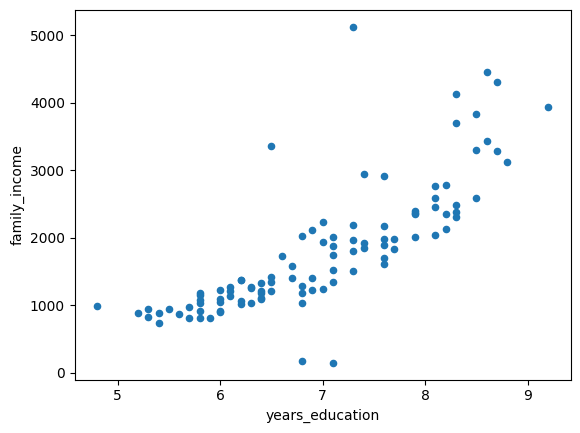

In [4]:
df_renda_estudo.plot.scatter(x="years_education", y="family_income")

<Axes: xlabel='years_education', ylabel='family_income'>

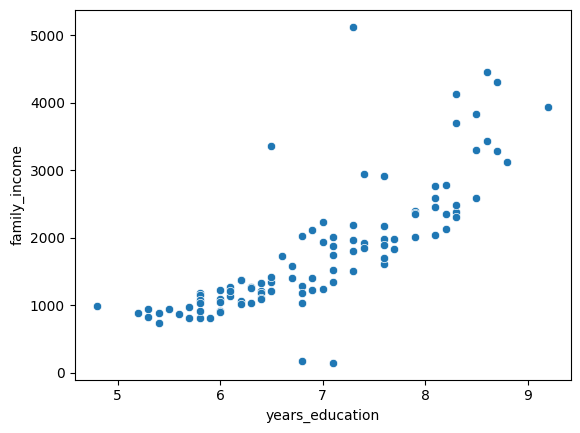

In [5]:
import seaborn as sns

sns.scatterplot(data=df_renda_estudo, x="years_education", y="family_income")

In [6]:
df_renda_estudo.cov()

,years_education,family_income
years_education,1.008511,760.782372
family_income,760.782372,921970.975442


In [7]:
df_renda_estudo.corr()

,years_education,family_income
years_education,1.000000,0.788972
family_income,0.788972,1.000000


In [8]:
from scipy.stats import linregress

linregress(df_renda_estudo["years_education"], df_renda_estudo["family_income"])

LinregressResult(slope=np.float64(754.3620207744607), intercept=np.float64(-3448.7992584949684), rvalue=np.float64(0.7889718417802907), pvalue=np.float64(7.054117802427187e-23), stderr=np.float64(58.74761882230723), intercept_stderr=np.float64(413.57819685417434))


## Introdução a regressão linear

A regressão linear é uma técnica estatística utilizada para modelar a relação entre duas ou mais variáveis. O objetivo principal da regressão linear é prever o valor de uma variável dependente (ou resposta) com base em uma ou mais variáveis independentes (ou preditoras). 

### Tipos de Regressão Linear

1. **Regressão Linear Simples:**
   - Envolve uma única variável independente e uma variável dependente.
   - O modelo assume a forma:
     $$
     y = \beta_0 + \beta_1x + \epsilon
     $$
     onde:
     - $ y $ é a variável dependente.
     - $ x $ é a variável independente.
     - $ \beta_0 $ é o intercepto (valor de $ y $ quando $ x $ é zero).
     - $ \beta_1 $ é o coeficiente de inclinação (mostra a mudança em $ y $ para cada unidade de mudança em $ x $).
     - $ \epsilon $ é o termo de erro (diferença entre o valor observado e o valor previsto).

2. **Regressão Linear Múltipla:**
   - Envolve duas ou mais variáveis independentes.
   - O modelo assume a forma:
     $$
     y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon
     $$
     onde $ x_1, x_2, \ldots, x_n $ são as variáveis independentes e $ \beta_1, \beta_2, \ldots, \beta_n $ são os coeficientes correspondentes.

### Objetivos da Regressão Linear

1. **Previsão:** Utilizar a relação entre as variáveis para prever o valor da variável dependente com base em novos valores das variáveis independentes.
2. **Interpretação:** Compreender a relação entre as variáveis, incluindo a direção e a magnitude dos efeitos das variáveis independentes sobre a variável dependente.
3. **Avaliação:** Avaliar a força e a significância das relações entre as variáveis através de medidas estatísticas como o coeficiente de determinação ($R^2$) e testes de significância.

### Exemplo Intuitivo

Imagine que você deseja prever o preço de venda de casas com base em seu tamanho. Você coleta dados sobre o tamanho (em metros quadrados) e os preços de várias casas vendidas recentemente. 

- Na **regressão linear simples**, você ajusta uma linha reta aos dados que melhor descreva a relação entre o tamanho da casa e o preço de venda. A equação da linha pode ser algo como:
  $$
  \text{Preço} = \beta_0 + \beta_1 \times \text{Tamanho}
  $$

- Com base nessa equação, você pode prever o preço de uma casa com um tamanho específico, entender como o tamanho afeta o preço e avaliar se a relação é forte e significativa.

### Coeficiente de determinação $R^2$

O coeficiente $R^2$ é uma medida de ajuste do modelo de regressão linear. Ele varia entre 0 e 1 e indica a proporção da variabilidade da variável dependente que é explicada pelas variáveis independentes. Quanto mais próximo de 1, melhor é o ajuste do modelo. O coeficiente $R^2$ é dado por:

$$
R^2 = 1 - \frac{\sum\limits_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum\limits_{i=1}^{n} (Y_i - \bar{Y})^2}
$$

em que:
- $Y_i$ é o valor observado da variável dependente;
- $\hat{Y}_i$ é o valor previsto da variável dependente;
- $\bar{Y}$ é a média da variável dependente;
- $n$ é o número de observações.
- $\sum\limits_{i=1}^{n} (Y_i - \hat{Y}_i)^2$ é a soma dos quadrados dos resíduos;
- $\sum\limits_{i=1}^{n} (Y_i - \bar{Y})^2$ é a soma total dos quadrados.

#### Interpretação do $R^2$

1. **Valor de $R^2$:**
   - $R^2$ varia entre 0 e 1.
   - Um $R^2$ de 0 indica que o modelo não explica nenhuma das variações na variável dependente.
   - Um $R^2$ de 1 indica que o modelo explica 100% da variação na variável dependente.
   - Valores intermediários indicam a proporção da variância que é explicada pelo modelo. Por exemplo, um $R^2$ de 0,75 indica que 75% da variação na variável dependente é explicada pelas variáveis independentes.

2. **Significado:**
   - Um $R^2$ alto (próximo de 1) sugere que o modelo fornece um bom ajuste aos dados.
   - Um $R^2$ baixo (próximo de 0) sugere que o modelo não explica bem a variação dos dados.

#### Exemplo 1: Previsão de Preço de Casas

Suponha que você está usando a regressão linear para prever o preço de venda de casas com base em seu tamanho. Se o seu modelo de regressão tem um $R^2$ de 0,85, isso significa que 85% da variação nos preços das casas pode ser explicada pelo tamanho das casas.

#### Exemplo 2: Estudo de Impacto de Publicidade

Imagine que você está analisando o impacto dos gastos com publicidade nas vendas de um produto. Um modelo de regressão que utiliza os gastos com publicidade para prever as vendas resulta em um $R^2$ de 0,60. Isso significa que 60% da variação nas vendas pode ser explicada pelos gastos com publicidade, enquanto os outros 40% são explicados por outros fatores não incluídos no modelo.

#### Limitações do $R^2$

1. **Não Indica Causalidade:**
   - Um $R^2$ alto não implica que há uma relação causal entre as variáveis independentes e a variável dependente. Ele apenas indica que há uma associação forte.

2. **Adequação ao Contexto:**
   - Um $R^2$ considerado "bom" pode variar dependendo do campo de estudo. Em ciências sociais, um $R^2$ de 0,3 pode ser visto como razoável, enquanto em ciências físicas, um $R^2$ acima de 0,9 pode ser esperado.


### Relação entre $R^2$ e $r$

O coeficiente de determinação ($R^2$) e o coeficiente de correlação de Pearson ($r$) estão relacionados, mas $R^2$ nem sempre é simplesmente o quadrado de $r$. Vamos explorar essa relação e as condições sob as quais $R^2$ é o quadrado de $r$.

- **Regressão Linear Simples:** 
  - Em uma regressão linear simples, onde há uma única variável independente ($x$) e uma variável dependente ($y$), o coeficiente de determinação ($R^2$) é, de fato, o quadrado do coeficiente de correlação de Pearson ($r$).
  - Isso ocorre porque tanto $r$ quanto $R^2$ medem a força e a direção da relação linear entre as duas variáveis.
  - Matematicamente, temos:
    $$
    R^2 = r^2
    $$
  - Aqui, $r$ é o coeficiente de correlação de Pearson que mede a correlação linear entre $x$ e $y$.

### Exemplo de Regressão Linear Simples

Imagine que você está analisando a relação entre a altura (em cm) e o peso (em kg) de um grupo de pessoas. Você calcula o coeficiente de correlação de Pearson ($r$) entre altura e peso e obtém $r = 0,8$. O $R^2$ será:
$$
R^2 = (0,8)^2 = 0,64
$$
Isso significa que 64% da variação no peso pode ser explicada pela altura.

### Regressão Linear Múltipla

- **Regressão Linear Múltipla:** 
  - Em uma regressão linear múltipla, onde há mais de uma variável independente, $R^2$ não é simplesmente o quadrado do coeficiente de correlação de Pearson.
  - O $R^2$ em regressão múltipla mede a proporção da variância na variável dependente que é explicada por todas as variáveis independentes juntas.
  - O coeficiente de correlação de Pearson não pode ser usado diretamente para calcular $R^2$ em regressão múltipla porque ele só mede a correlação entre duas variáveis.

### Interpretação de $R^2$ e $r$

1. **$r$ (Coeficiente de Correlação de Pearson):**
   - Mede a força e a direção da relação linear entre duas variáveis.
   - Varia de -1 a +1.
   - Um $r$ de +1 indica uma correlação linear positiva perfeita.
   - Um $r$ de -1 indica uma correlação linear negativa perfeita.
   - Um $r$ de 0 indica nenhuma correlação linear.

2. **$R^2$ (Coeficiente de Determinação):**
   - Mede a proporção da variância na variável dependente que é explicada pelas variáveis independentes.
   - Varia de 0 a 1.
   - Um $R^2$ de 1 indica que o modelo explica toda a variância na variável dependente.
   - Um $R^2$ de 0 indica que o modelo não explica nenhuma variância na variável dependente.

### Quando $R^2$ é o Quadrado de $r$?

- $R^2$ é o quadrado de $r$ apenas em regressão linear simples.
- Em regressão linear múltipla, $R^2$ não é o quadrado de $r$ e deve ser interpretado como a proporção da variância explicada por todas as variáveis independentes no modelo.


In [9]:
resultado_regressao = linregress(df_renda_estudo["years_education"], df_renda_estudo["family_income"])

resultado_regressao

LinregressResult(slope=np.float64(754.3620207744607), intercept=np.float64(-3448.7992584949684), rvalue=np.float64(0.7889718417802907), pvalue=np.float64(7.054117802427187e-23), stderr=np.float64(58.74761882230723), intercept_stderr=np.float64(413.57819685417434))

In [10]:
coeficiente_determinacao = resultado_regressao.rvalue**2

coeficiente_determinacao

np.float64(0.622476567122184)

Isso significa que 62% da variação de renda familiar pode ser explicada pelos anos de ensino.

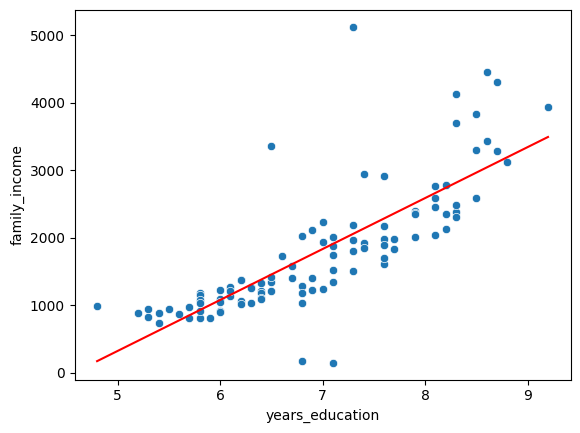

In [14]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

sns.scatterplot(data=df_renda_estudo, x="years_education", y="family_income")

ax.plot(
    df_renda_estudo['years_education'],
    resultado_regressao.intercept + resultado_regressao.slope * df_renda_estudo['years_education'],
    color = 'red'

)

plt.show()

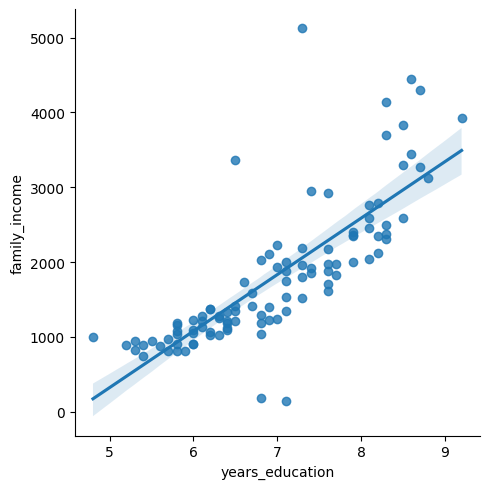

In [15]:
sns.lmplot(data=df_renda_estudo,x='years_education', y='family_income')